In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Here is the fundamental mode.

13_102.5_104.5_0.1.npy


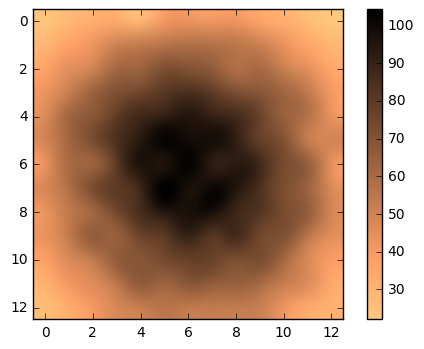

13_370_400_0.5.npy


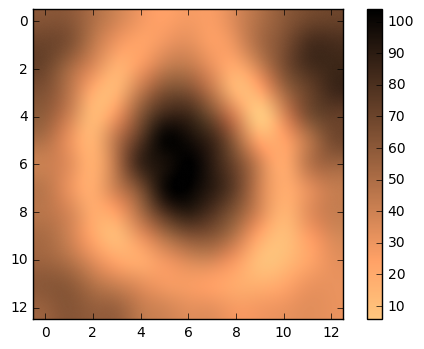

13_467_474_0.2.npy


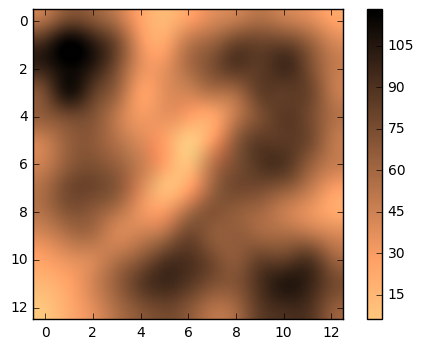

13_479_485_0.2.npy


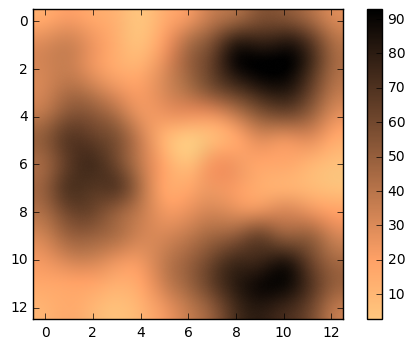

13_490_496_0.2.npy


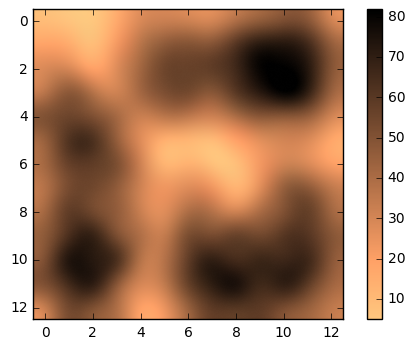

15_216_220_0.2.npy


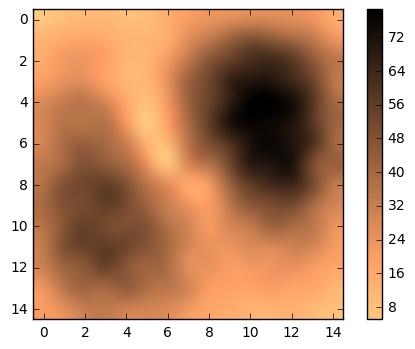

15_314.5_318.5_0.2.npy


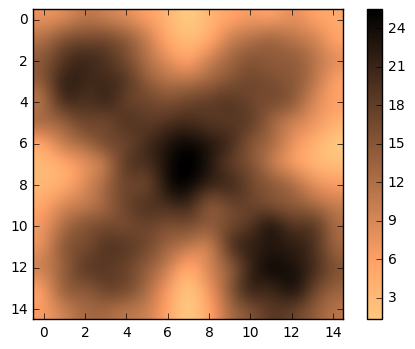

15_646_650_0.2.npy


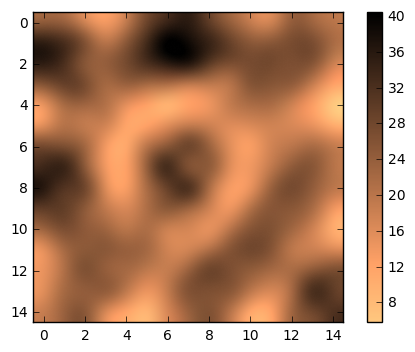

15_710_718_0.2.npy


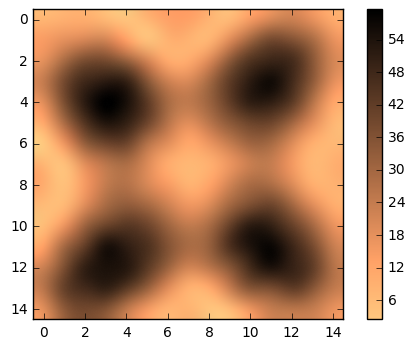

15_711_717_0.2.npy


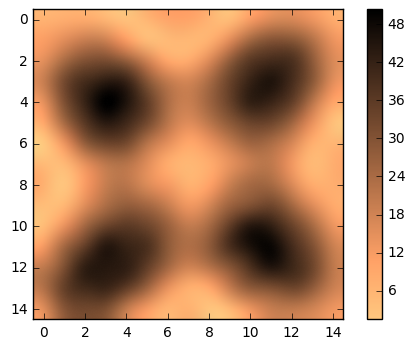

15_900_905_0.2.npy


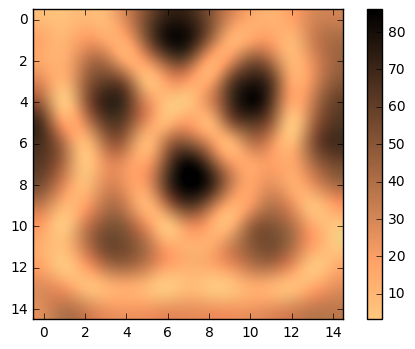

17_1003_1009_0.2.npy


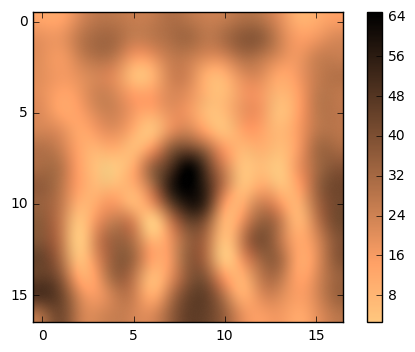

17_499_506_0.2.npy


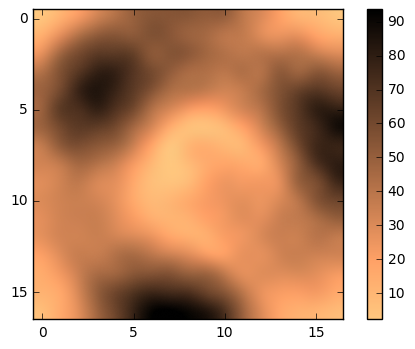

In [82]:
data_filenames = [
    '13_102.5_104.5_0.1.npy',
    '13_370_400_0.5.npy',
    '13_467_474_0.2.npy',
    '13_479_485_0.2.npy',
    '13_490_496_0.2.npy',
    '15_216_220_0.2.npy',
    '15_314.5_318.5_0.2.npy',
    '15_646_650_0.2.npy',
    '15_710_718_0.2.npy',
    '15_711_717_0.2.npy',
    '15_900_905_0.2.npy',
    '17_1003_1009_0.2.npy',
    '17_499_506_0.2.npy'
]
for data_filename in data_filenames:
    amplitude = np.load('data/'+data_filename)
    summed_z = np.sum(amplitude, 2)
    print(data_filename)
    plt.imshow(summed_z, cmap='copper_r', interpolation='lanczos')
    plt.colorbar()
    plt.show()

17_499_506_0.2.npy


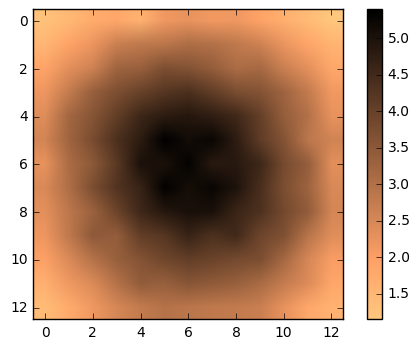

In [67]:
amplitude = np.load('data/13_102.5_104.5_0.1.npy')
summed_z = np.max(amplitude, 2)
print(data_filename)
plt.imshow(summed_z, cmap='copper_r')
plt.colorbar()

Here we generate a fit to this:

In [68]:
f1 = lambda x: 0.75*(np.cos(x)+.333*np.cos(3*x))

Here we calculate the appropriate range of x values. We do not go all the way to the edge (i.e., $\pm\pi/2$), as the sensor does not. The sensor only goes to 6000 steps out of a total $7950\pm50$ steps. 

In [69]:
fraction_to_edge = 5000./7950
x = np.linspace(
    -np.pi/2.*fraction_to_edge,
    np.pi/2.*fraction_to_edge,
    13)
y = np.copy(x)
fake_amplitude = np.dot(f1(x[:, None]), f1(x[None, :]))

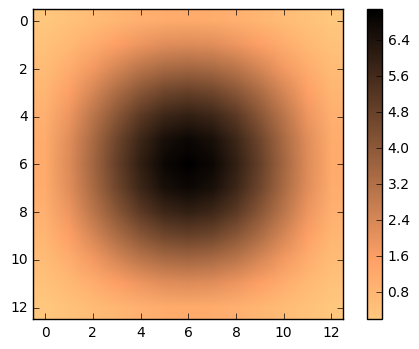

In [70]:
plt.imshow(7.09340111*fake_amplitude, cmap='copper_r')
plt.colorbar()

In [71]:
minimize(lambda a: np.sum(np.square(a*fake_amplitude-summed_z)), [1])

      fun: 203.1605227035528
 hess_inv: array([[ 0.01411495]])
      jac: array([  1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([ 7.03049303])

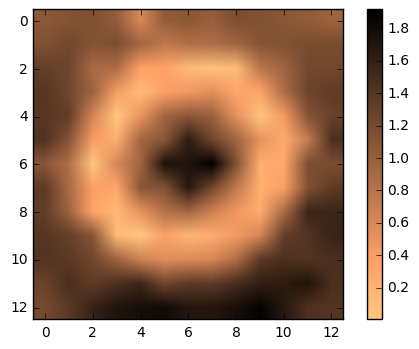

In [73]:
plt.imshow(np.abs(7.03049303*fake_amplitude-summed_z), cmap='copper_r')
plt.colorbar()

15_710_718_0.2.npy


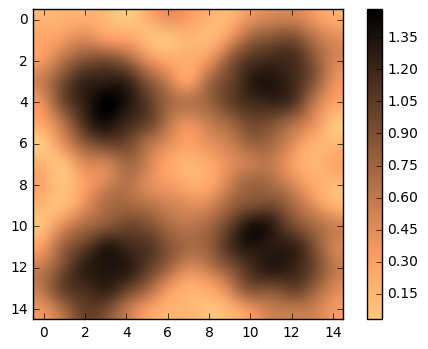

15_711_717_0.2.npy


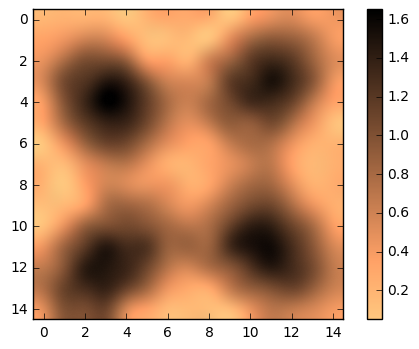

In [90]:
identical_mappings = [
    '15_710_718_0.2.npy',
    '15_711_717_0.2.npy']
summed_z = []
for i, data_filename in enumerate(identical_mappings):
    amplitude = np.load('data/'+data_filename)
    if i ==0:
        summed_z.append(amplitude[:, :, 10])
    else:
        summed_z.append(amplitude[:, :, 5])
    print(data_filename)
    plt.imshow(summed_z[i], cmap='copper_r', interpolation='lanczos')
    plt.colorbar()
    plt.show()

In [93]:
np.sqrt(np.sum(np.square(summed_z[0]/np.sum(summed_z[0])-summed_z[1])))

1.3358143583597237